# Track 3: Object Detection with LiDAR Data from Trondheim

## Imports

In [82]:
import os
import pandas as pd
import numpy as np
from helpers import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches


### Loading in the dataset (Cybele)

In [73]:

DATAPATH = "/datasets/tdt4265/ad/NAPLab-LiDAR"
print("Data directory")
print(os.listdir(DATAPATH))


Data directory
['images', 'names.txt', 'labels_yolo_v1.1', 'train.txt', 'data.txt']


In [74]:
# train.txt includes path to training data
train = pd.read_csv("data/train.txt", sep=" ", header=None)
print(train.head())
train.describe()

                         0
0  images/frame_000000.PNG
1  images/frame_000001.PNG
2  images/frame_000002.PNG
3  images/frame_000003.PNG
4  images/frame_000004.PNG


,0
count,1905
unique,1905
top,images/frame_000000.PNG
freq,1


In [87]:
# Load the names of the classes
class_names = pd.read_csv("data/names.txt", header=None)
class_names = class_names[0].to_dict()
print(class_names)

{0: 'car', 1: 'truck', 2: 'bus', 3: 'motorcycle', 4: 'bicycle', 5: 'scooter', 6: 'person', 7: 'rider'}


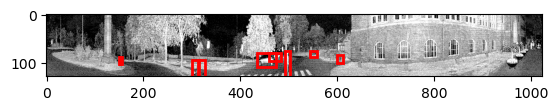

In [85]:
# Label data
label1_path = os.path.join("data/labels_yolo_v1.1", train.iloc[0, 0].split("/")[-1].replace(".PNG", ".txt"))
label1 = pd.read_csv(label1_path, sep=" ", header=None)

# First image
image1_path = os.path.join("data/", train.iloc[0, 0])
image1 = plt.imread(image1_path)

# Convert the YOLO-formatted labels to bounding box coordinates
label1['x_min'] = (label1[1] - label1[3] / 2) * image1.shape[1]
label1['x_max'] = (label1[1] + label1[3] / 2) * image1.shape[1]
label1['y_min'] = (label1[2] - label1[4] / 2) * image1.shape[0]
label1['y_max'] = (label1[2] + label1[4] / 2) * image1.shape[0]

# Plot the bounding boxes
fig, ax = plt.subplots(1)
ax.imshow(image1)
for _, row in label1.iterrows():
    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    rect = patches.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min, edgecolor='r', linewidth=2, fill=False)
    ax.add_patch(rect)
    label = class_names[row['class_id']]
    plt.text(x_min, y_min, label, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
    
# Show the plot
plt.show()


The label data is utilizing the YOLO-format. We want to visua